# Power Spectrum Simulations

This notebook introduces the frequency domain simulations used in this project.

Power spectra are simulated using [specparam](https://fooof-tools.github.io/).

In [1]:
# Setup notebook state
from nbutils import setup_notebook; setup_notebook()

In [2]:
from fooof.sim import gen_power_spectrum
from fooof.plts import plot_spectra
from neurodsp.utils import set_random_seed
from neurodsp.plts import plot_power_spectra

In [3]:
# Import custom project code
from apm.io import APMDB
from apm.plts.utils import figsaver
from apm.plts.style import custom_psd_style_no_grid, custom_psd_style_no_ticks

## Settings

First, we define some simulation settings. 

In [4]:
# Define base settings for power spectrum simulations
freq_range = [3, 40]

In [5]:
# Settings for saving figures
SAVE_FIG = True
FIGPATH = APMDB().figs_path / '15_spectrum_sims'

# Create helper function to manage figsaver settings
fsaver = figsaver(SAVE_FIG, FIGPATH)

In [6]:
# Plot settings
plt_kwargs = {
    'log_freqs' : True,
    'log_powers' : True, 
    'lw' : 3,
    'colors' : ['black', 'blue'], 
    'linestyle' : ['-', '--'],
    'figsize' : (8.5, 6.5),
}

In [7]:
# Set random seed
set_random_seed(111)

### Single Peak & Fixed Mode

First, we can simulate a power spectrum with a single peak with a 1/f aperiodic component. 

In [8]:
# Simulate a power spectrum
freqs, powers = gen_power_spectrum([3, 40], [1, 1], [10, 0.3, 1], nlv=0.025)

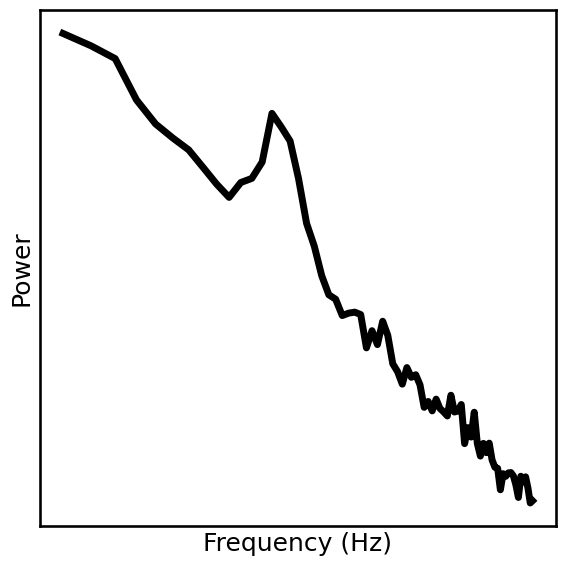

In [9]:
# Plot the power spectrum
plot_power_spectra(freqs, powers, lw=5, ylabel='Power', colors='black',
                   custom_styler=custom_psd_style_no_grid, **fsaver('psd_fixed'))

### Multi-Peak & Knee Mode

Next, we can simulate a pwoer spectrum that has multiple peaks, and an aperiodic component with a knee.

In [10]:
# Simulate a power spectrum, with a knee
freqs, powers = gen_power_spectrum([1, 75], [0, 400, 1], [[5, 0.025, 1], [30, 0.02, 4]], nlv=0.001)

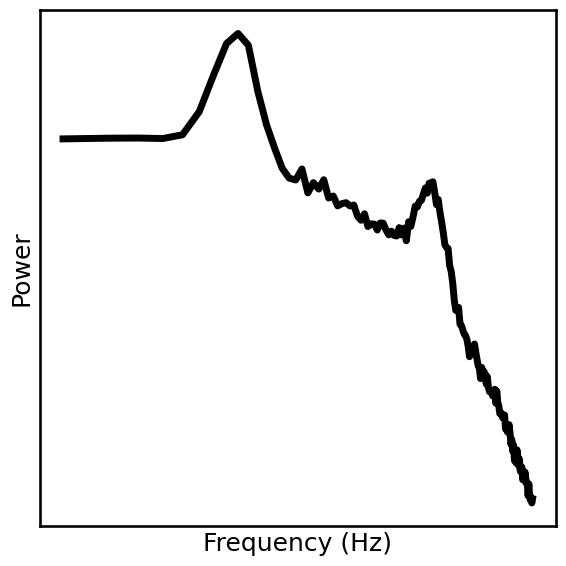

In [11]:
# Plot the power spectrum
plot_power_spectra(freqs, powers, lw=5, ylabel='Power', colors='black',
                   custom_styler=custom_psd_style_no_grid, **fsaver('psd_knee'))

## Simulate Different Aperiodic Modes

In simulating power spectra, we can think of different variations (or 'models') of the aperiodic component. 

In this section we will explore what it looks like to simulate and measure aperiodic activity with power spectra simulated with different model forms.

#### Aperiodic Only

By 'aperiodic only' we mean signals that are pure 1/f.

In [12]:
# Simulate an example power spectrum, and model, that is aperiodic activity only
freqs, powers_ap = gen_power_spectrum(freq_range, [0, 1], [], nlv=0.05)
freqs, model = gen_power_spectrum(freq_range, [0, 1], [], nlv=0.00)

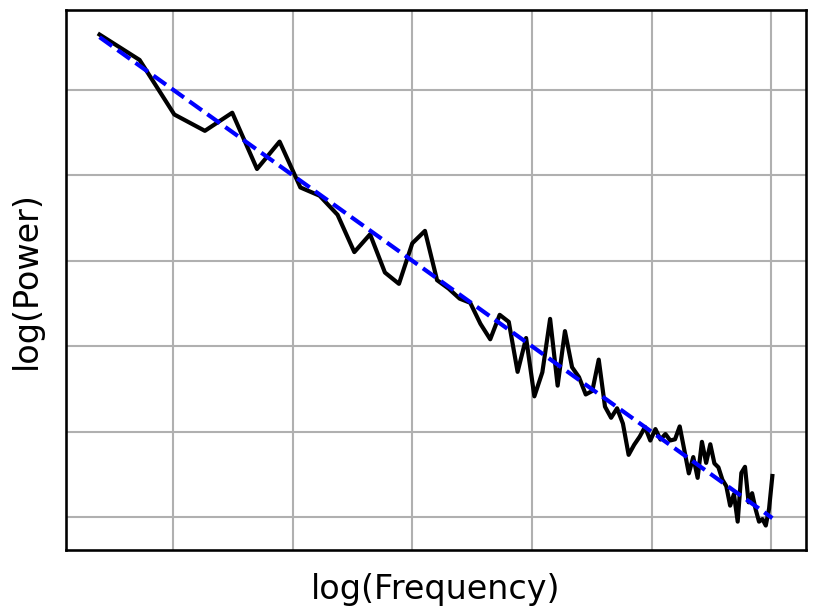

In [13]:
# Plot the simulated aperiodic signal and model
plot_spectra(freqs, [powers_ap, model], **plt_kwargs,             
             custom_styler=custom_psd_style_no_ticks, **fsaver('psd_exp_ap'))

#### Combined

By 'combined' signals, we mean those that have both aperiodic and periodic components.

In [14]:
# Simulate an example power spectrum that has an aperiodic component and an overlying peak
freqs, powers_comb = gen_power_spectrum(freq_range, [0, 1], [10, 0.75, 0.75], nlv=0.05)

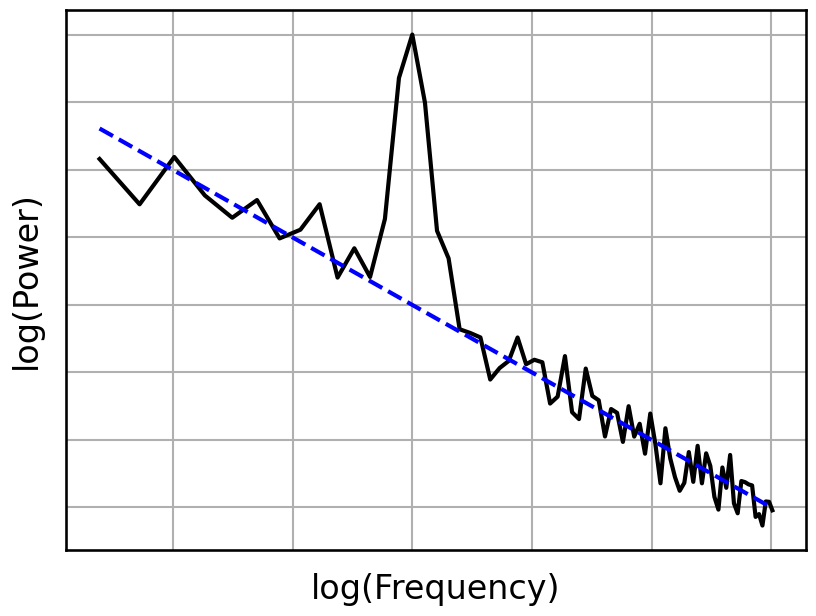

In [15]:
# Plot the simulated combined signal and model
plot_spectra(freqs, [powers_comb, model],  **plt_kwargs,
             custom_styler=custom_psd_style_no_ticks, **fsaver('psd_exp_comb'))

#### Knee Model

By 'knee model', we mean an aperiodic component with a 'knee', or a bend in the log-log power spectrum.

In [16]:
# Define the frequency range to use for the knee model
freq_range_knee = [1, 100]

In [17]:
# Simulate an example power spectrum, and model, with a knee
freqs, powers_knee = gen_power_spectrum(freq_range_knee, [0, 100, 1], [], nlv=0.01)
freqs, model_knee = gen_power_spectrum(freq_range_knee, [0, 100, 1], [], nlv=0.0)

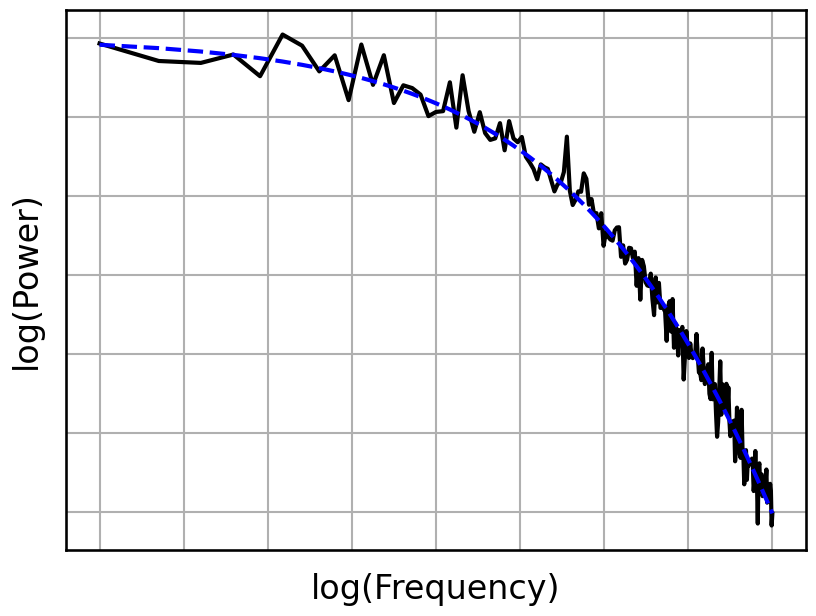

In [18]:
# Plot the simulated knee signal and model
plot_spectra(freqs, [powers_knee, model_knee],  **plt_kwargs,
             custom_styler=custom_psd_style_no_ticks, **fsaver('psd_exp_knee'))

#### Combined Knee Model

A combined model can also have be created with a knee signal.

In [19]:
# Simulate an example power spectrum with a knee aperiodic component and an overlying peak
freqs, powers_knee_comb = gen_power_spectrum(freq_range_knee, [0, 100, 1], [8, 0.10, 1.5], nlv=0.01)

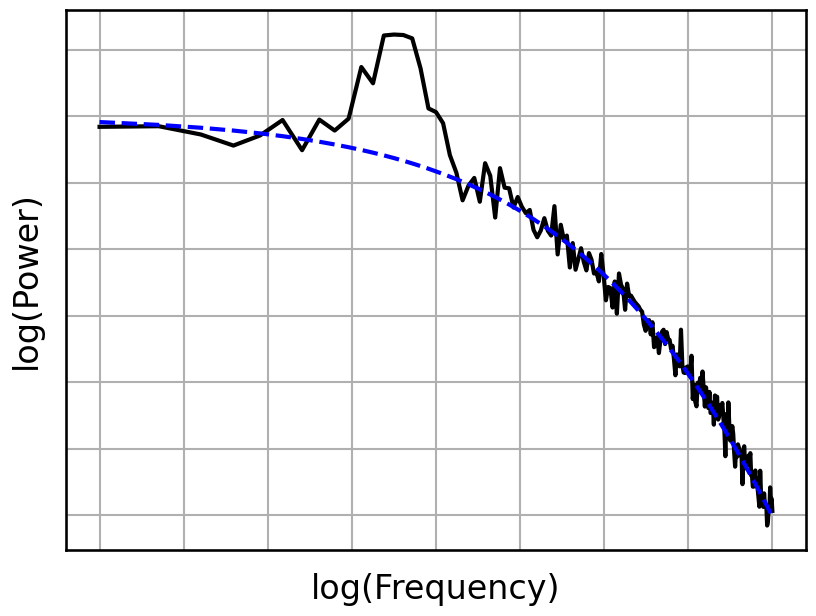

In [20]:
# Plot the simulated combined knee signal and model
plot_spectra(freqs, [powers_knee_comb, model_knee],  **plt_kwargs,
             custom_styler=custom_psd_style_no_ticks, **fsaver('psd_exp_knee_comb'))